In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
df.shape

(5110, 12)

In [4]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
df = df.drop(columns = ['id'])

In [10]:
### ID columns will not contribute for the analysis

In [11]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
cat = []
num = []
for i  in df.columns:
    if(df[i].dtype in ['float64', 'int64']):
        num.append(i)
    else:
        cat.append(i)

In [14]:
cat

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [15]:
num

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [16]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [17]:
for i in cat:
    print(df[i].nunique())

3
2
5
2
4


# UNIVARIATE ANALYSIS

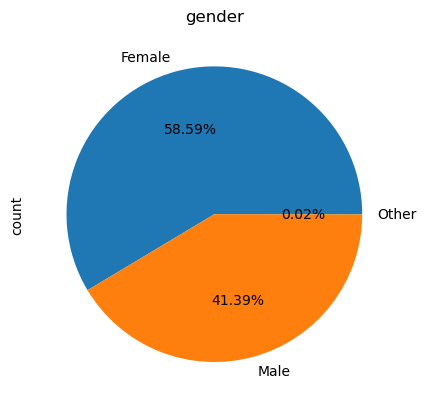

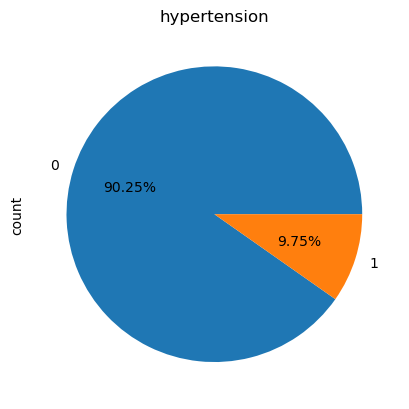

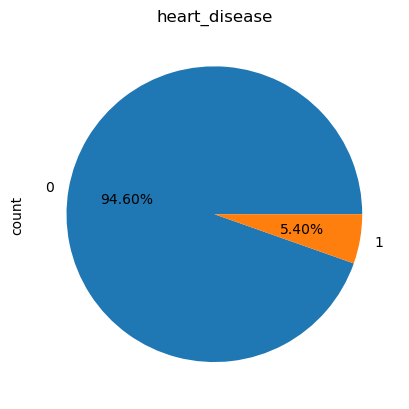

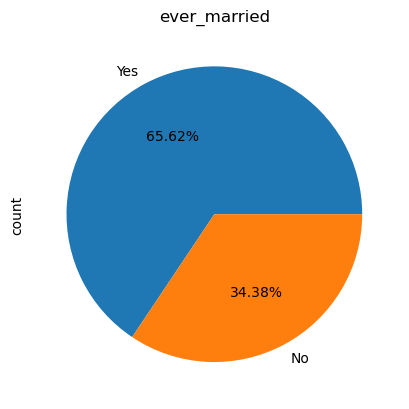

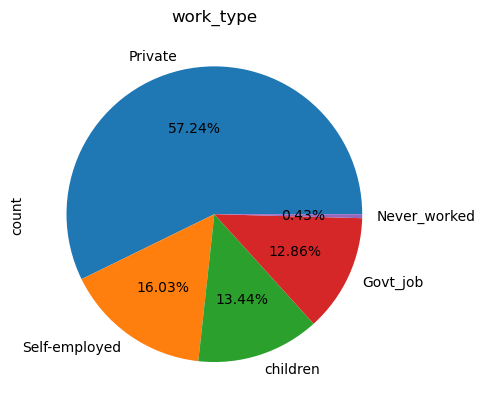

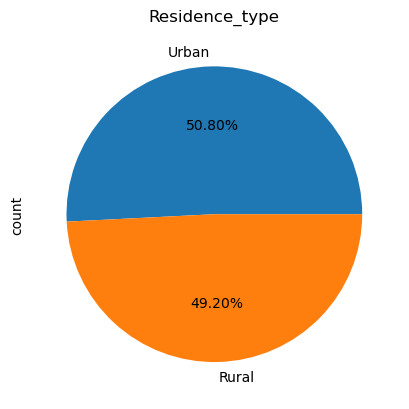

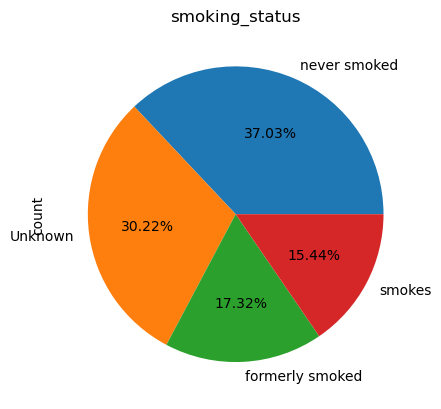

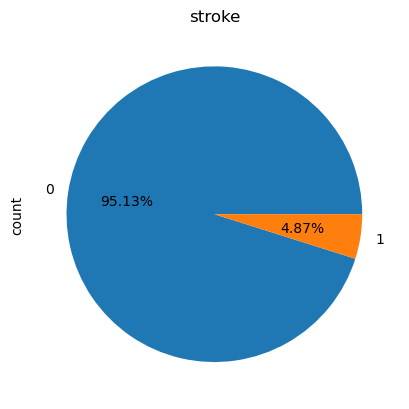

In [18]:
for i in df.columns:
    if df[i].nunique() < 10:  
        df[i].value_counts().plot(kind="pie", autopct="%1.2f%%")
        plt.title(i)
        plt.show()
        

### for categorical columns


In [48]:
gender_stroke = df.groupby('gender')['stroke'].mean() * 100
print(gender_stroke)


gender
Female    4.709419
Male      5.106383
Other     0.000000
Name: stroke, dtype: float64


In [ ]:
### males are more prone to stroke than female

In [49]:
gender_stroke = df.groupby('smoking_status')['stroke'].mean() * 100
print(gender_stroke)


smoking_status
Unknown            3.044041
formerly smoked    7.909605
never smoked       4.756871
smokes             5.323194
Name: stroke, dtype: float64


In [ ]:
### formerly smoking people are prone to stroke ...we need to focus more on these people

In [50]:
gender_stroke = df.groupby('work_type')['stroke'].mean() * 100
print(gender_stroke)

work_type
Govt_job         5.022831
Never_worked     0.000000
Private          5.094017
Self-employed    7.936508
children         0.291121
Name: stroke, dtype: float64


In [ ]:
### self-employed people prone to stroke

In [51]:
gender_stroke = df.groupby('ever_married')['stroke'].mean() * 100
print(gender_stroke)

ever_married
No     1.650541
Yes    6.561288
Name: stroke, dtype: float64


In [ ]:
### married people are prone to stroke 

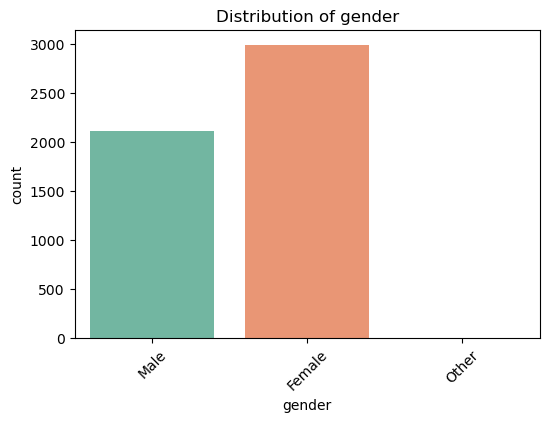

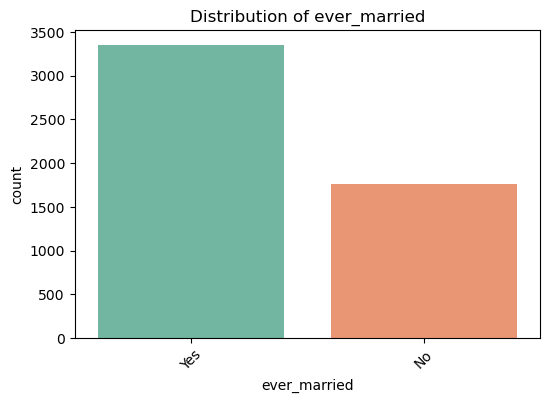

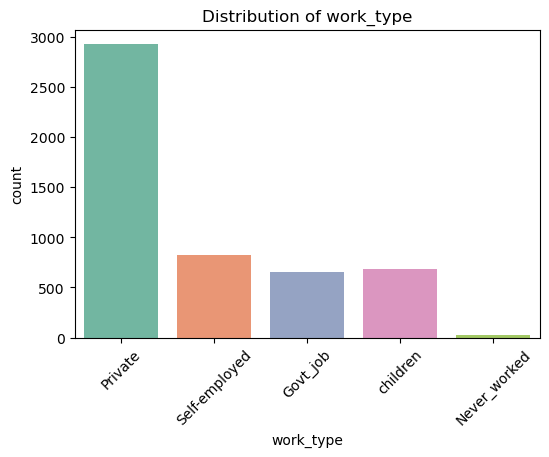

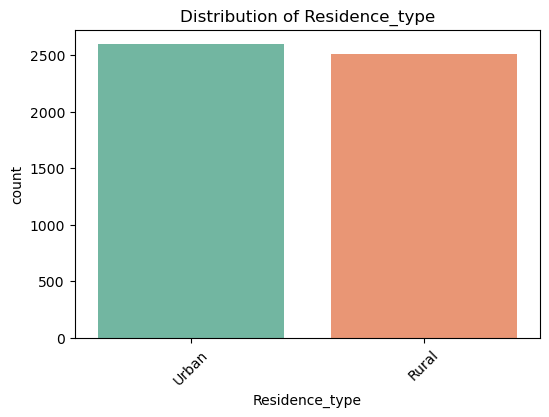

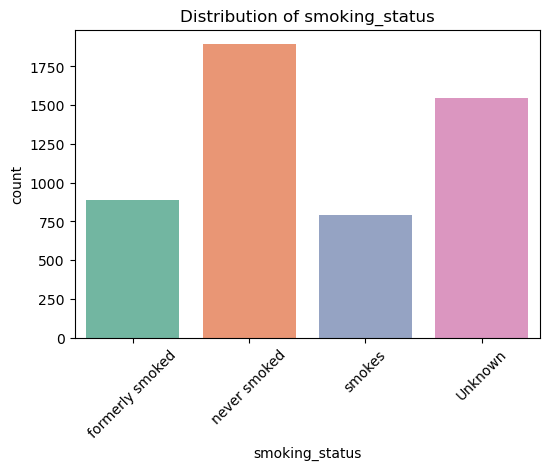

In [19]:
for col in cat:
    plt.figure(figsize=(6, 4))  
    sns.countplot(x=df[col], data=df, palette="Set2")  
    plt.title(f"Distribution of {col}")  
    plt.xticks(rotation=45)  
    plt.show(block=True)

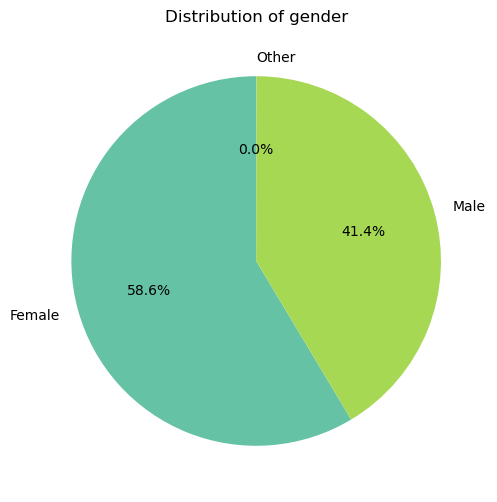

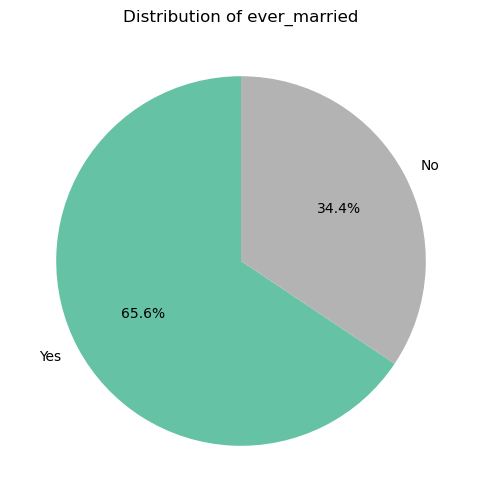

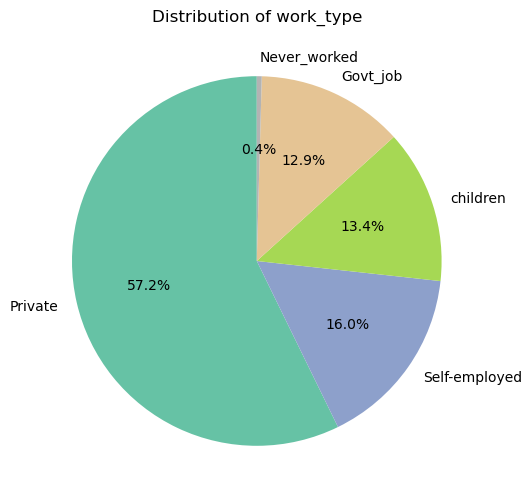

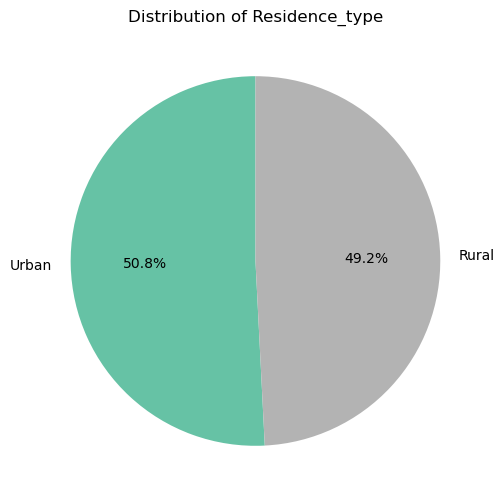

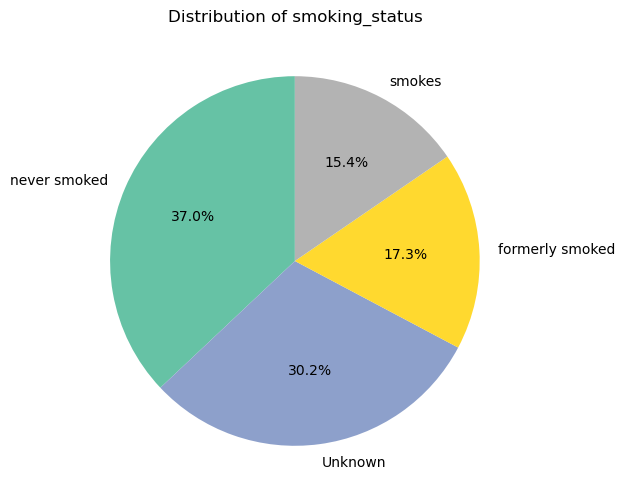

In [20]:
for col in cat:
    plt.figure(figsize=(6, 6))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', cmap='Set2', startangle=90)
    plt.title(f"Distribution of {col}")
    plt.ylabel('')  
    plt.show()

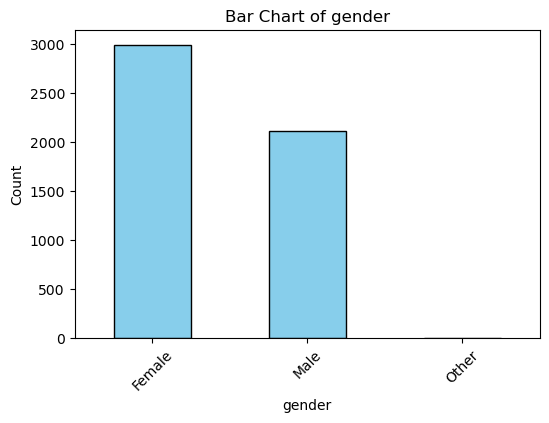

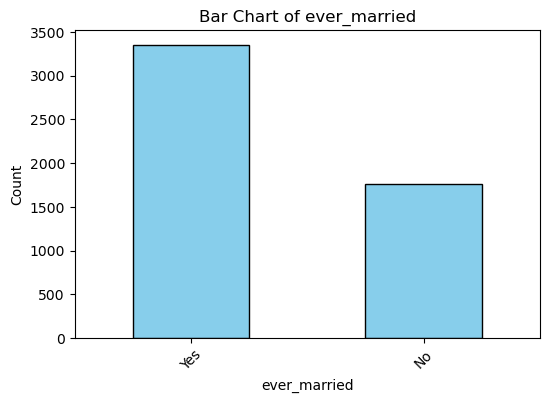

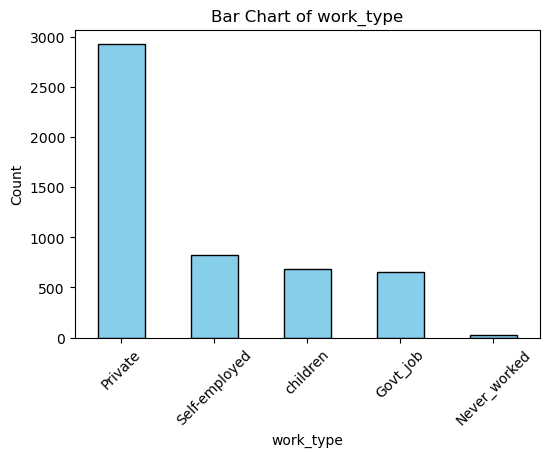

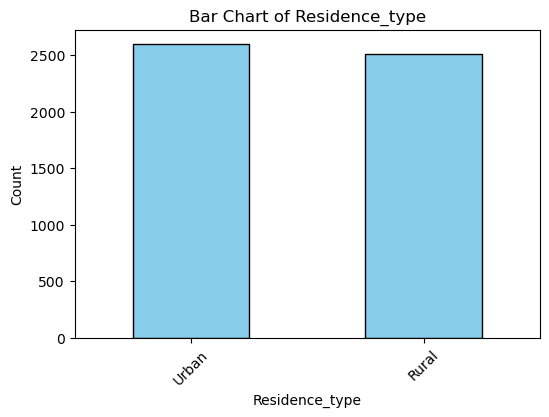

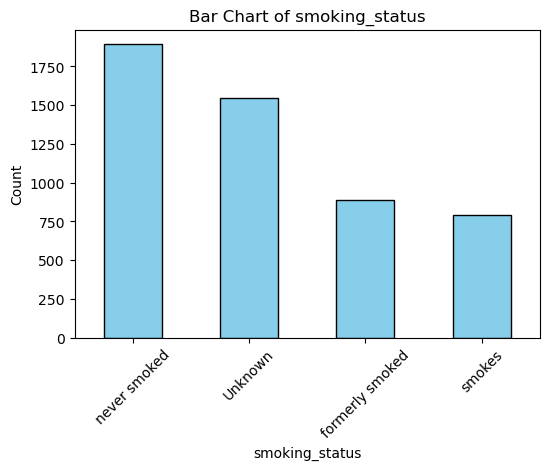

In [21]:
for col in cat:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

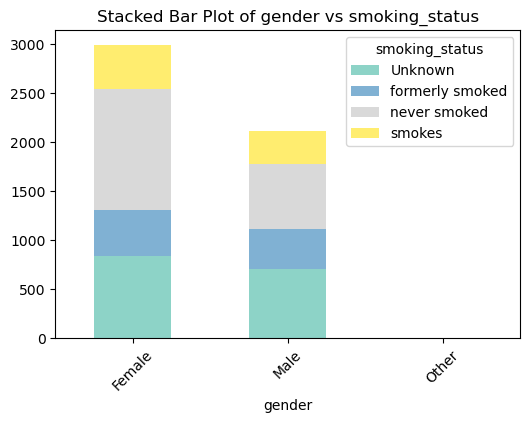

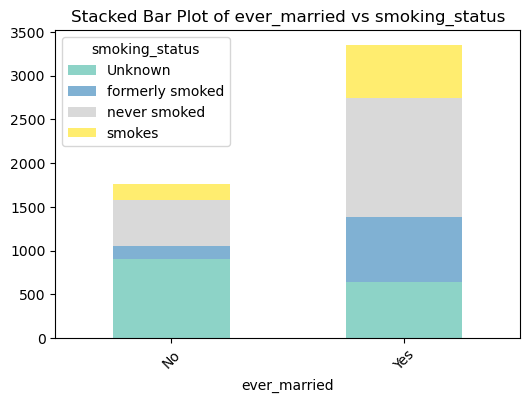

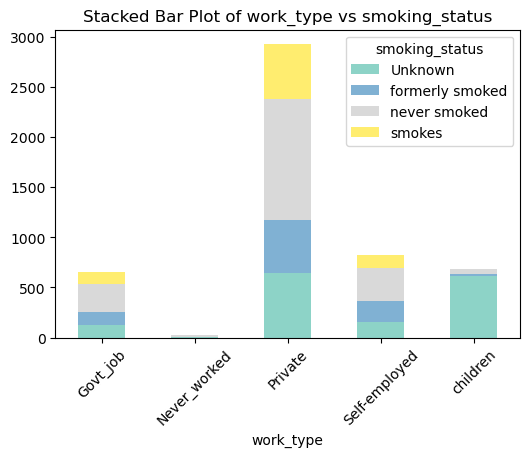

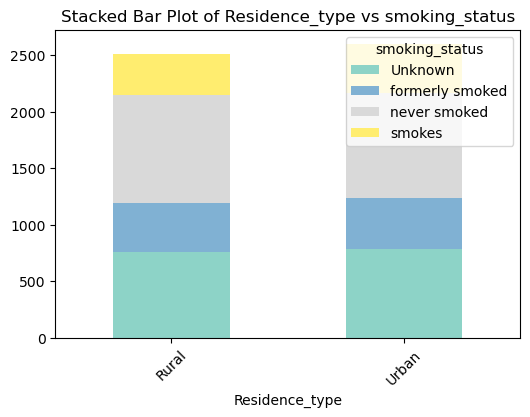

In [22]:
for col in cat:
    if col != 'smoking_status':  
        pd.crosstab(df[col], df['smoking_status']).plot(kind='bar', stacked=True, colormap='Set3', figsize=(6, 4))
        plt.title(f"Stacked Bar Plot of {col} vs smoking_status")
        plt.xticks(rotation=45)
        plt.show()

In [ ]:
### private employee do not smoke much

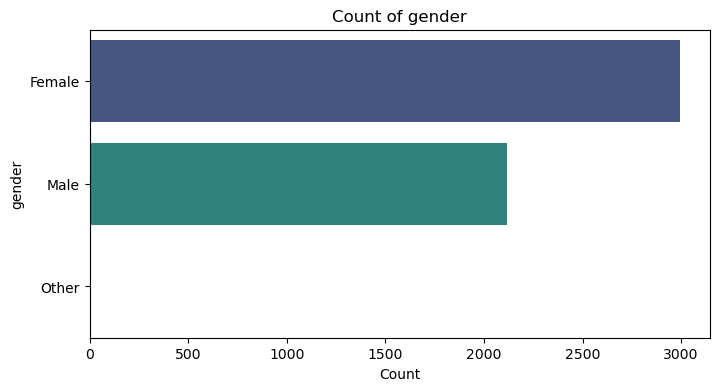

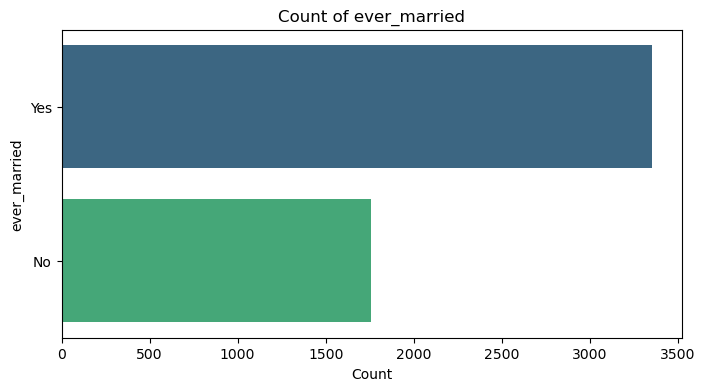

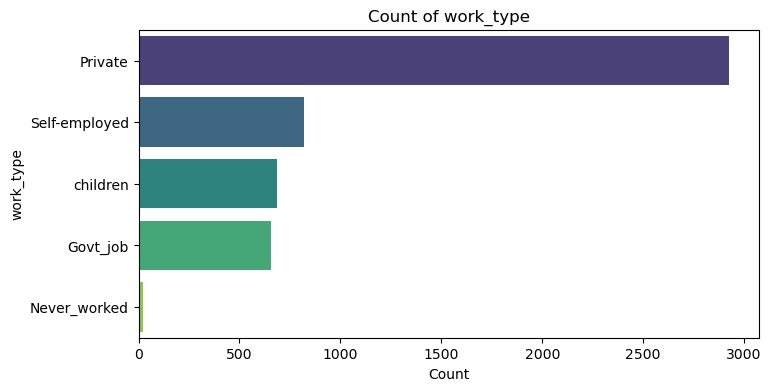

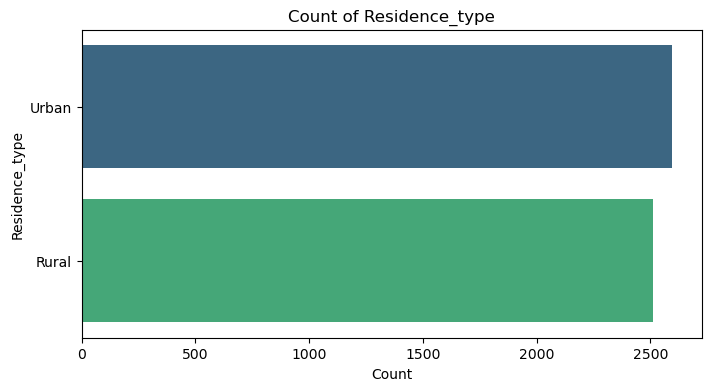

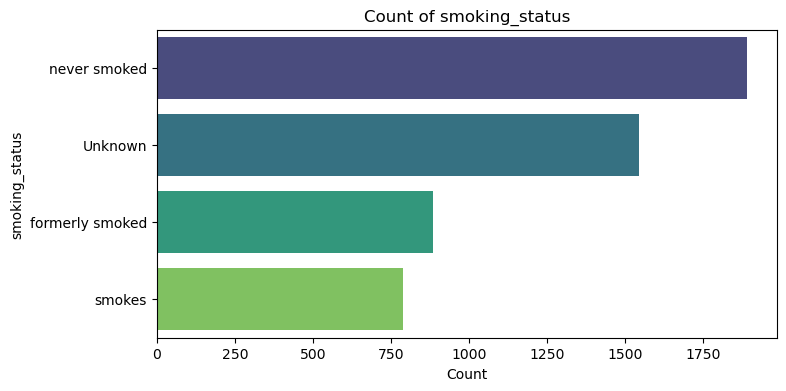

In [23]:
for col in cat:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], palette="viridis", order=df[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

### numerical col

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


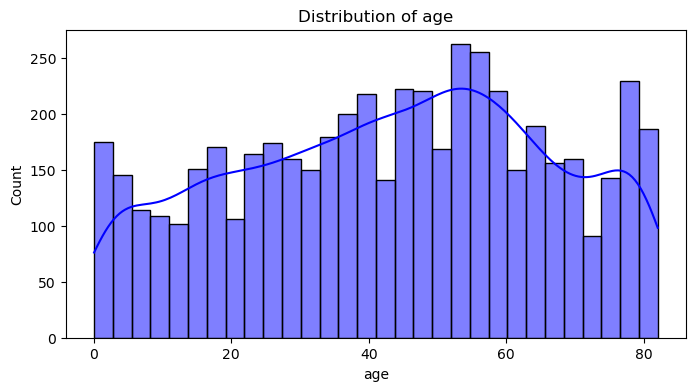

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


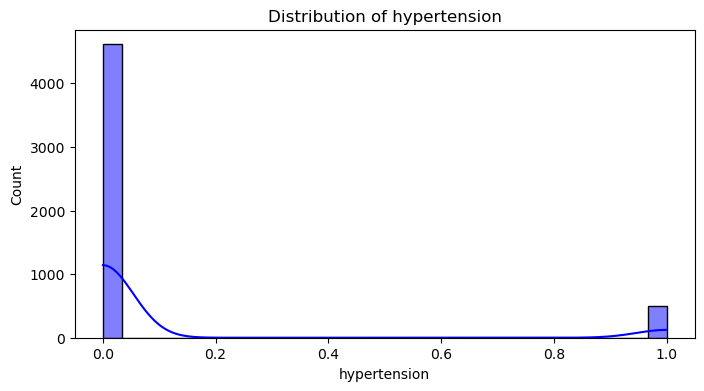

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


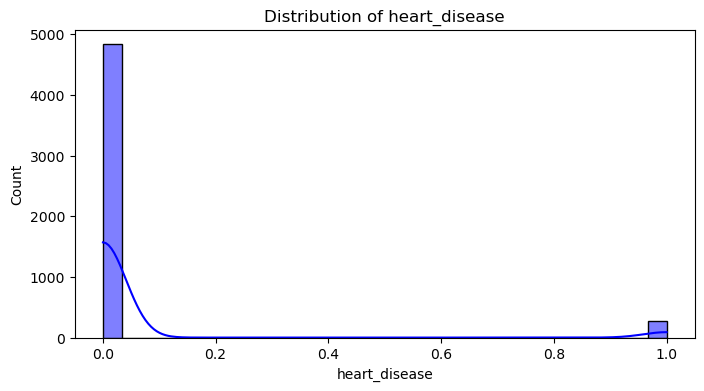

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


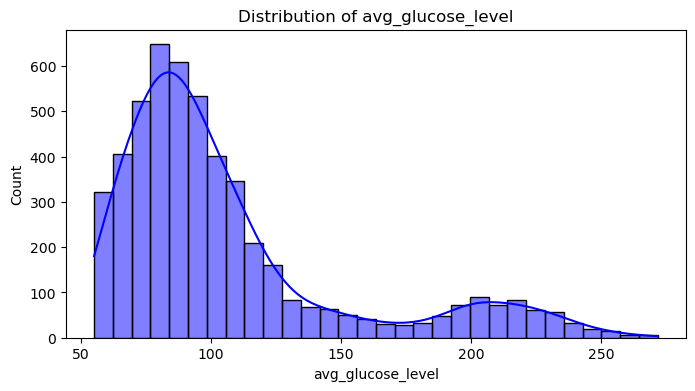

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


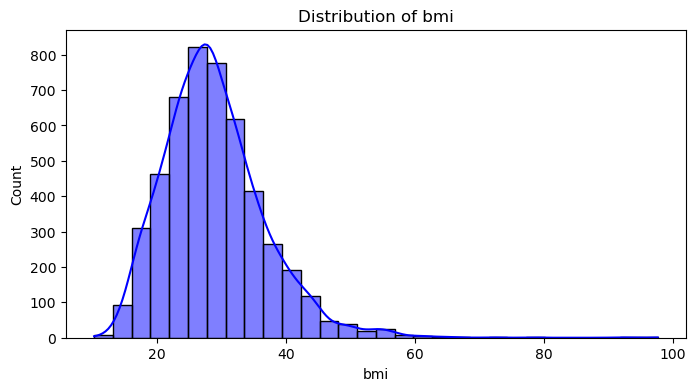

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


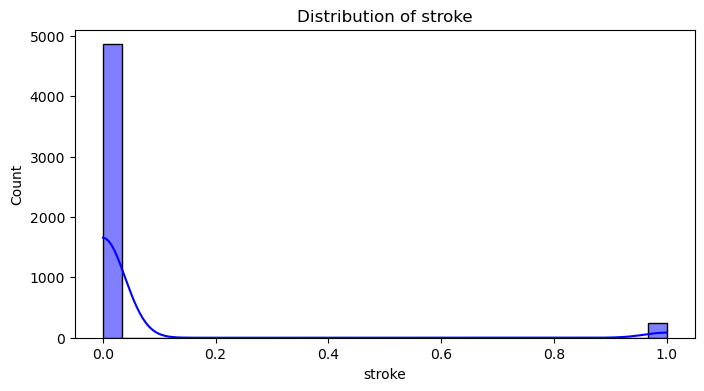

In [24]:
for col in num:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

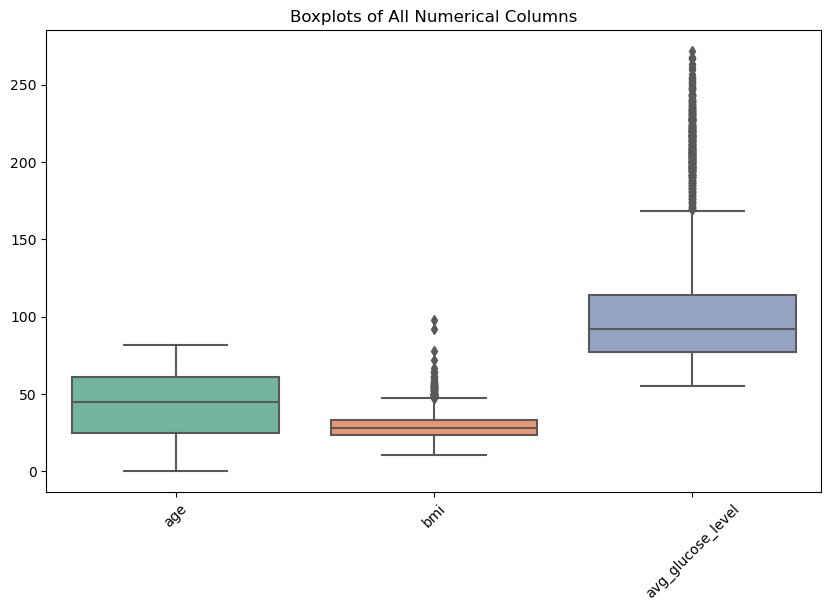

In [25]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(data=df[['age','bmi','avg_glucose_level']], palette="Set2")  
plt.title("Boxplots of All Numerical Columns")
plt.xticks(rotation=45) 
plt.show()

In [ ]:
### avg_glucose_level having more outliers 

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


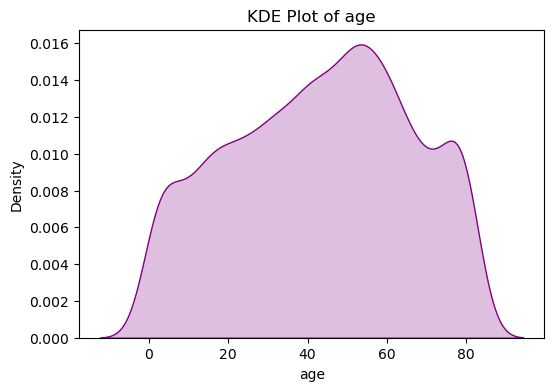

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


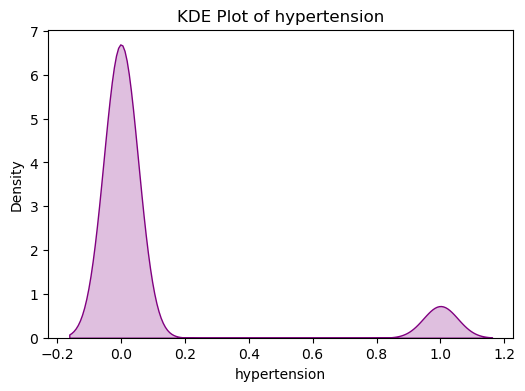

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


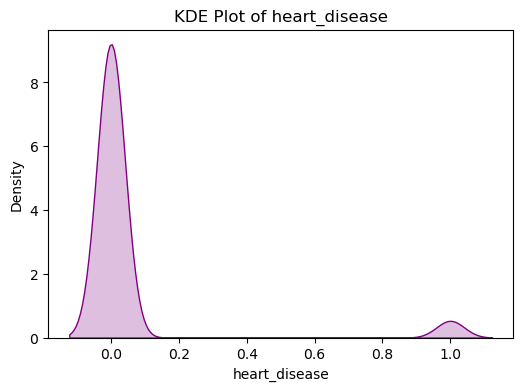

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


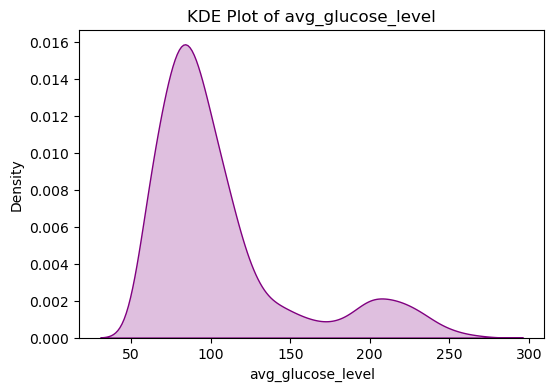

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


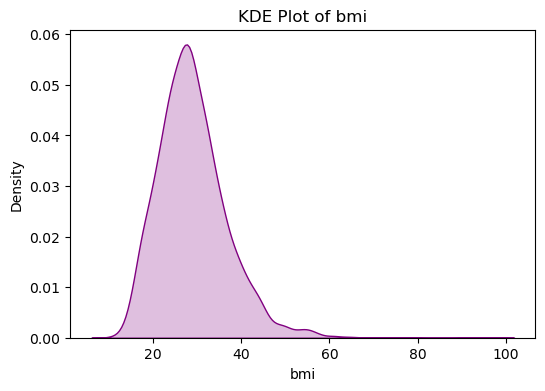

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


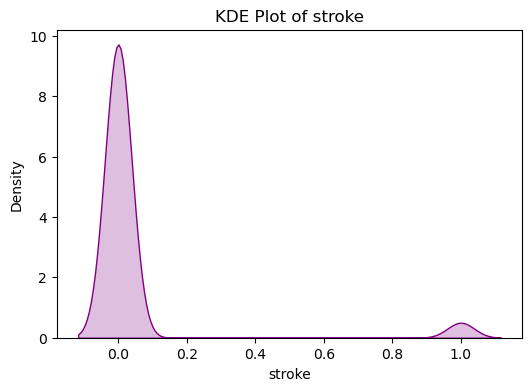

In [26]:
for col in num:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df[col], fill=True, color="purple")
    plt.title(f"KDE Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

In [ ]:
### mostly numerical columns are normally distributed

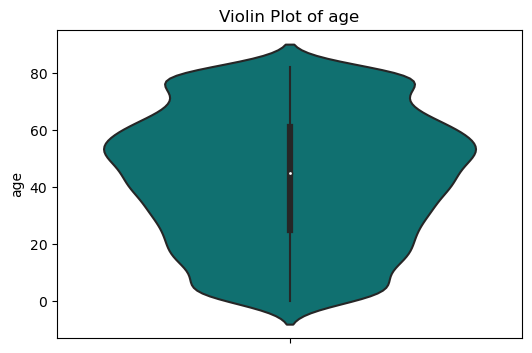

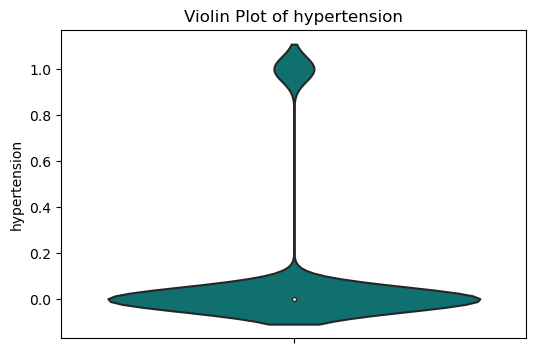

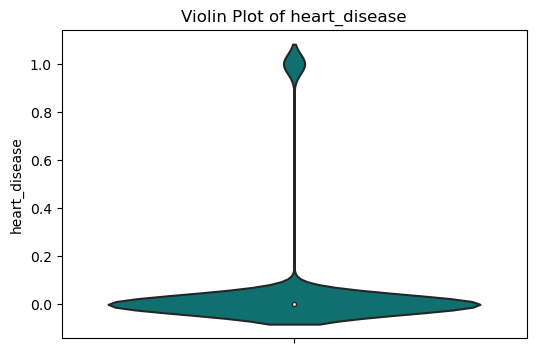

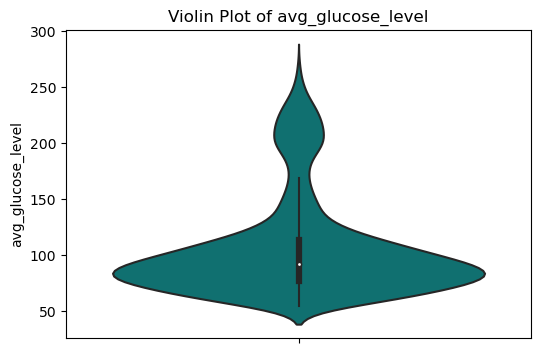

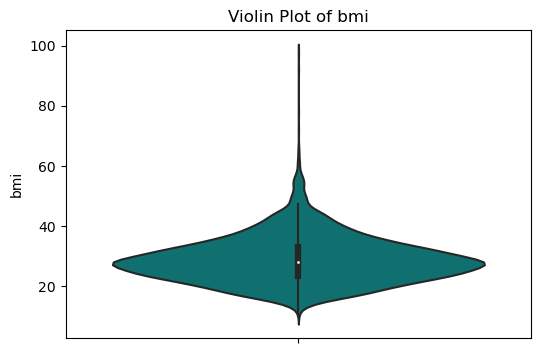

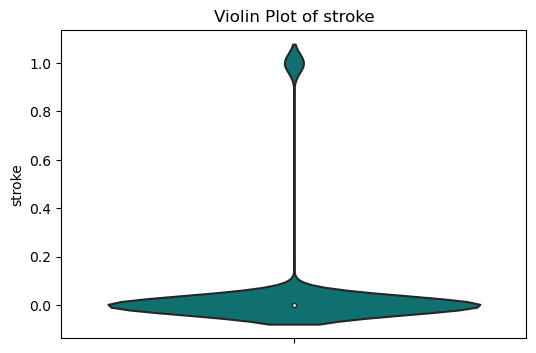

In [27]:
for col in num:
    plt.figure(figsize=(6, 4))
    sns.violinplot(y=df[col], color="teal")
    plt.title(f"Violin Plot of {col}")
    plt.ylabel(col)
    plt.show()


In [28]:
import warnings
warnings.filterwarnings("ignore")


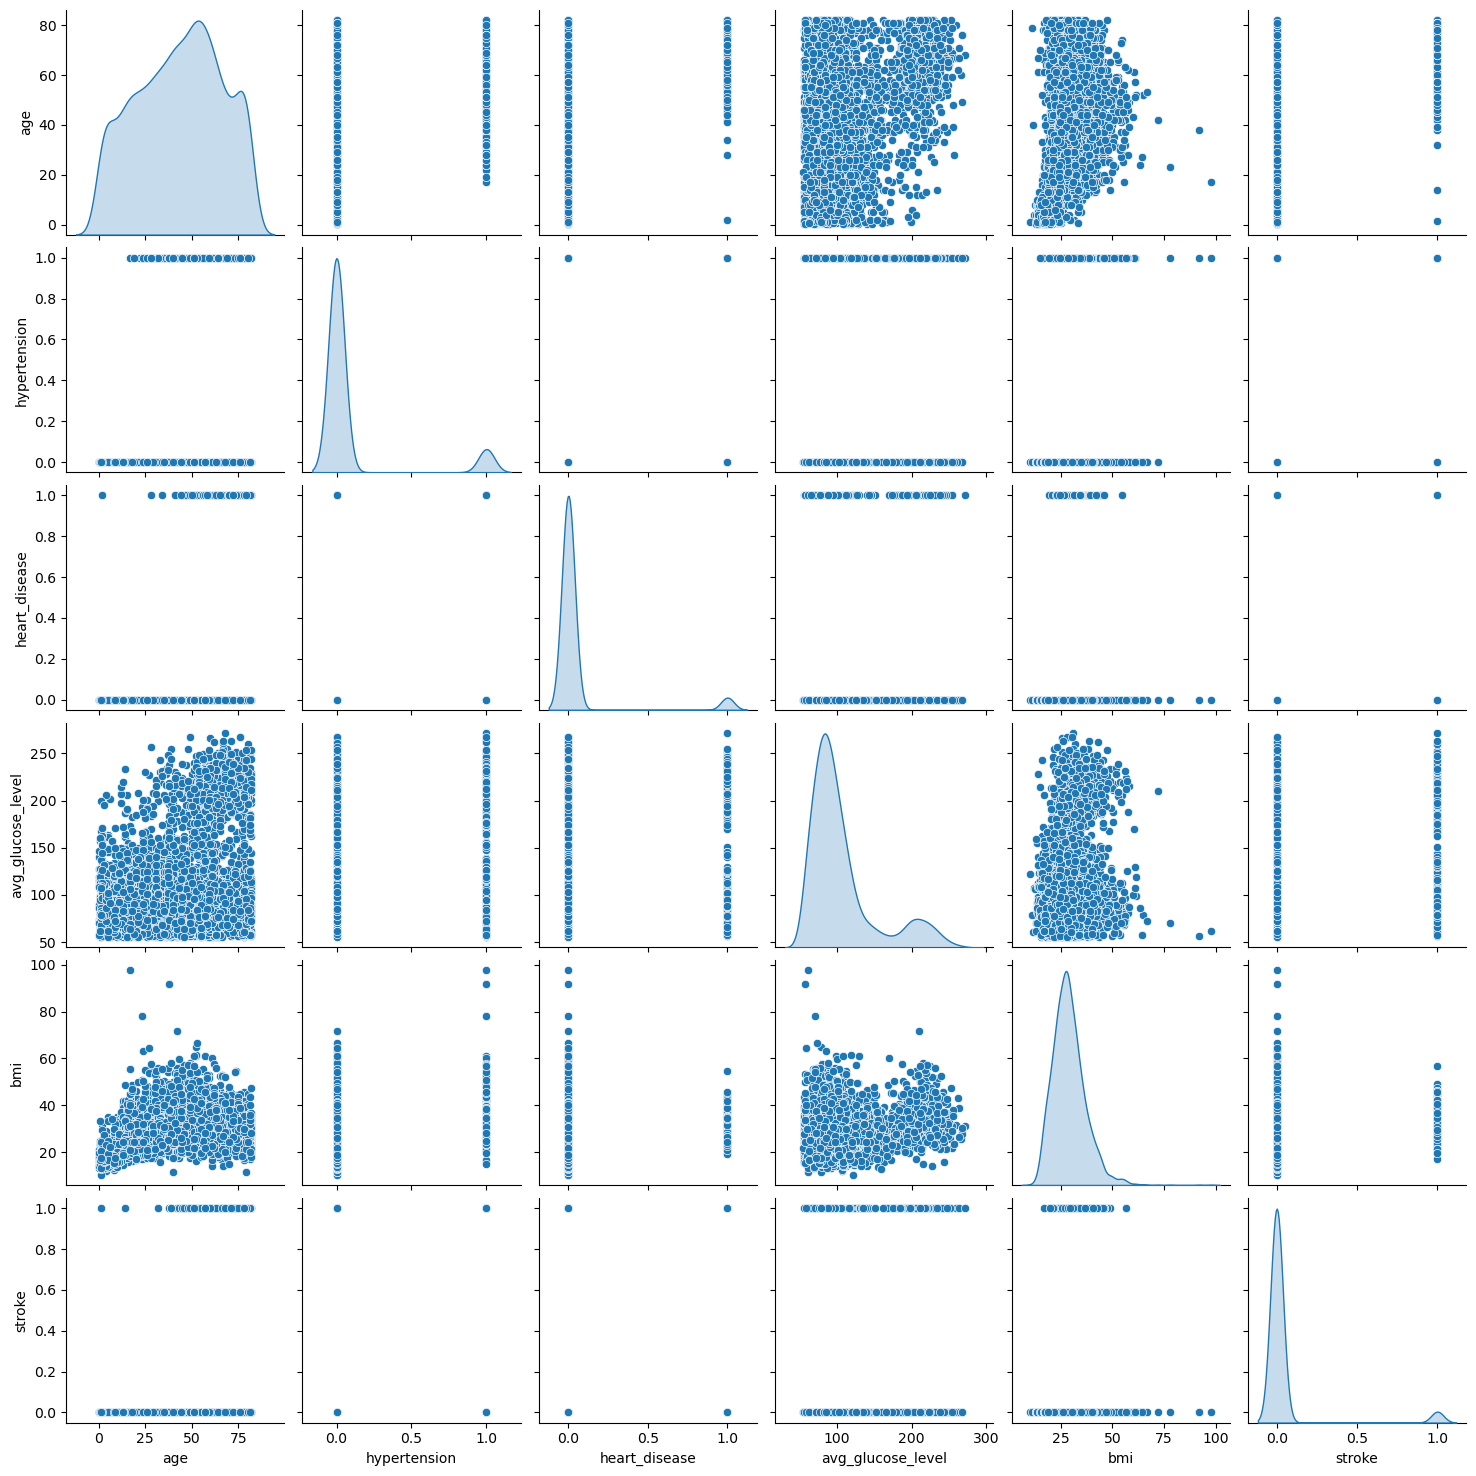

In [29]:
sns.pairplot(df[num], diag_kind="kde")
plt.show()

In [30]:
df[num].skew()


age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.055340
stroke               4.193284
dtype: float64

In [31]:
Q1 = df[num].quantile(0.25)
Q3 = df[num].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[num] < (Q1 - 1.5 * IQR)) | (df[num] > (Q3 + 1.5 * IQR))).sum()
print(outliers)

age                    0
hypertension         498
heart_disease        276
avg_glucose_level    627
bmi                  110
stroke               249
dtype: int64


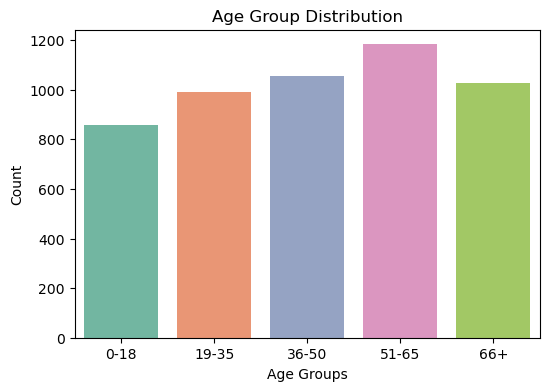

In [32]:

bins = [0, 18, 35, 50, 65,100]  
labels = ["0-18", "19-35", "36-50", "51-65","66+"]

df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)

plt.figure(figsize=(6, 4))
sns.countplot(x=df["age_group"], palette="Set2")
plt.title("Age Group Distribution")
plt.xlabel("Age Groups")
plt.ylabel("Count")
plt.show()

Percentage of Stroke Cases by Age Group:
age_group
0-18      0.233645
19-35     0.101112
36-50     1.611374
51-65     5.917160
66+      15.481986
Name: stroke, dtype: float64


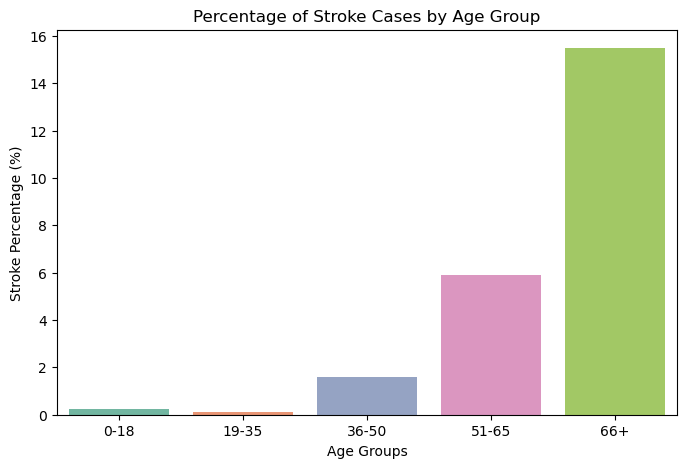

In [52]:
# Define age bins and labels
bins = [0, 18, 35, 50, 65, 100]  
labels = ["0-18", "19-35", "36-50", "51-65", "66+"]

# Create age groups
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)

# Calculate percentage of stroke cases in each age group
stroke_percentage = df.groupby("age_group")["stroke"].mean() * 100

# Display results
print("Percentage of Stroke Cases by Age Group:")
print(stroke_percentage)

# Plot the stroke percentage for each age group
plt.figure(figsize=(8, 5))
sns.barplot(x=stroke_percentage.index, y=stroke_percentage.values, palette="Set2")
plt.title("Percentage of Stroke Cases by Age Group")
plt.xlabel("Age Groups")
plt.ylabel("Stroke Percentage (%)")
plt.show()


In [ ]:
### age group 51-65 not having a good health 

## BIVARIATE ANALYSIS

In [33]:
pd.crosstab(df["stroke"], df["smoking_status"])

smoking_status,Unknown,formerly smoked,never smoked,smokes
stroke,,,,
0,1497,815,1802,747
1,47,70,90,42


In [34]:
pd.crosstab(df["smoking_status"], df["Residence_type"])

Residence_type,Rural,Urban
smoking_status,,
Unknown,762,782
formerly smoked,428,457
never smoked,961,931
smokes,363,426


In [35]:
pd.crosstab(df["ever_married"], df["hypertension"])

hypertension,0,1
ever_married,,
No,1704,53
Yes,2908,445


In [37]:
from scipy.stats import chi2_contingency
import pandas as pd
def chi_square_test(crosstab):
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f"Chi-Square Value: {chi2:.2f}")
    print(f"P-Value: {p:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies:\n", expected)
    print("-" * 50)

# Perform Chi-Square test on each crosstab
print("Chi-Square Test: Stroke vs Smoking Status")
chi_square_test(pd.crosstab(df["stroke"], df["smoking_status"]))

print("Chi-Square Test: Smoking Status vs Residence Type")
chi_square_test(pd.crosstab(df["smoking_status"], df["Residence_type"]))

print("Chi-Square Test: Ever Married vs Hypertension")
chi_square_test(pd.crosstab(df["ever_married"], df["hypertension"]))

Chi-Square Test: Stroke vs Smoking Status
Chi-Square Value: 29.15
P-Value: 0.0000
Degrees of Freedom: 3
Expected Frequencies:
 [[1468.76399217  841.87573386 1799.80665362  750.55362035]
 [  75.23600783   43.12426614   92.19334638   38.44637965]]
--------------------------------------------------
Chi-Square Test: Smoking Status vs Residence Type
Chi-Square Value: 5.40
P-Value: 0.1447
Degrees of Freedom: 3
Expected Frequencies:
 [[759.61174168 784.38825832]
 [435.39921722 449.60078278]
 [930.81956947 961.18043053]
 [388.16947162 400.83052838]]
--------------------------------------------------
Chi-Square Test: Ever Married vs Hypertension
Chi-Square Value: 136.68
P-Value: 0.0000
Degrees of Freedom: 1
Expected Frequencies:
 [[1585.76986301  171.23013699]
 [3026.23013699  326.76986301]]
--------------------------------------------------


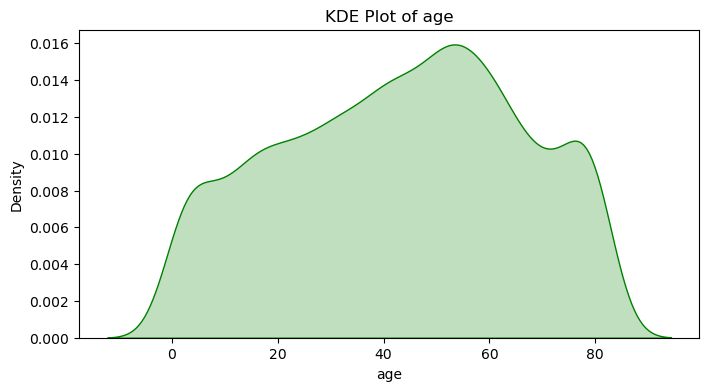

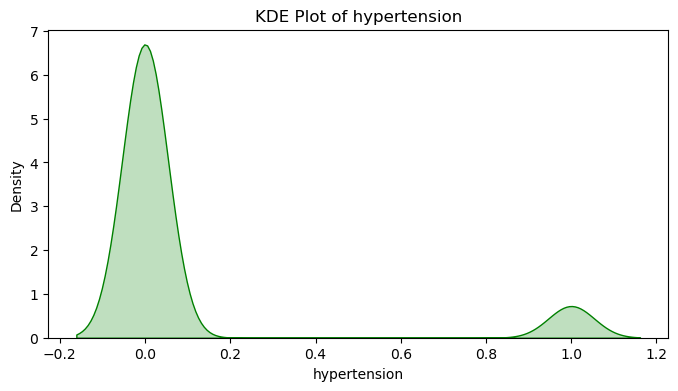

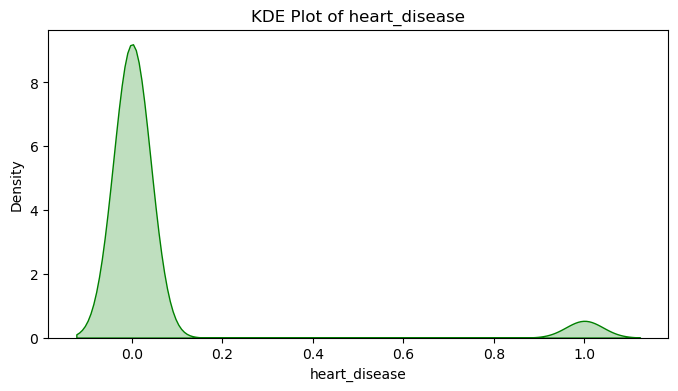

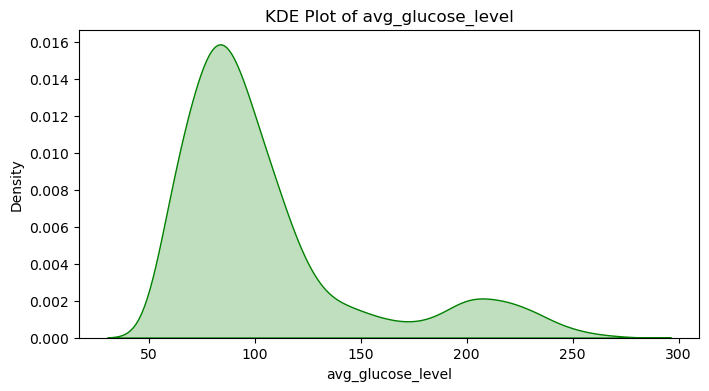

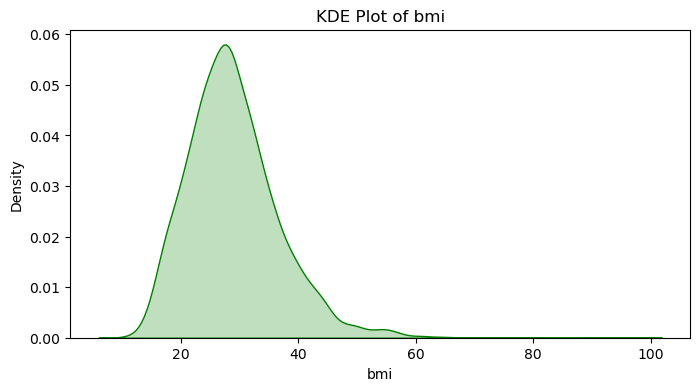

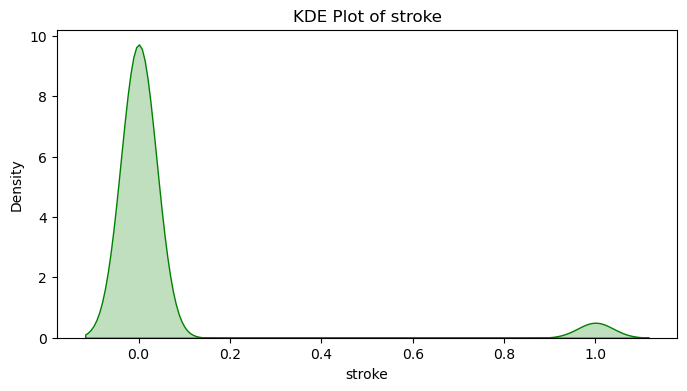

In [38]:
for col in num:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[col], shade=True, color="green")
    plt.title(f"KDE Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

In [ ]:
### KDE plot for numerical columns are normally distributed

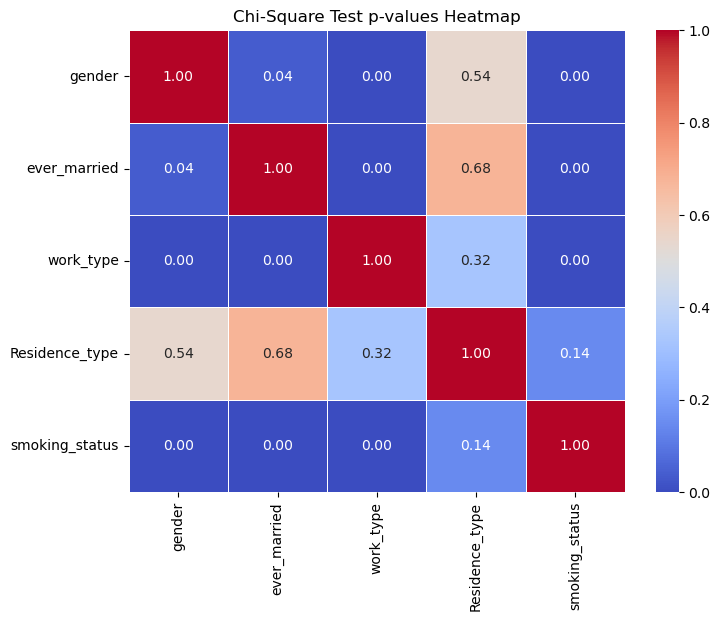

In [53]:
corr_matrix = pd.DataFrame(index=cat, columns=cat)

for col1 in cat:
    for col2 in cat:
        if col1 == col2:
            corr_matrix.loc[col1, col2] = 1 
        else:
            chi2, p, _, _ = chi2_contingency(pd.crosstab(df[col1], df[col2]))
            corr_matrix.loc[col1, col2] = p 

corr_matrix = corr_matrix.astype(float)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Chi-Square Test p-values Heatmap")
plt.show()

### categorical vs numerical 

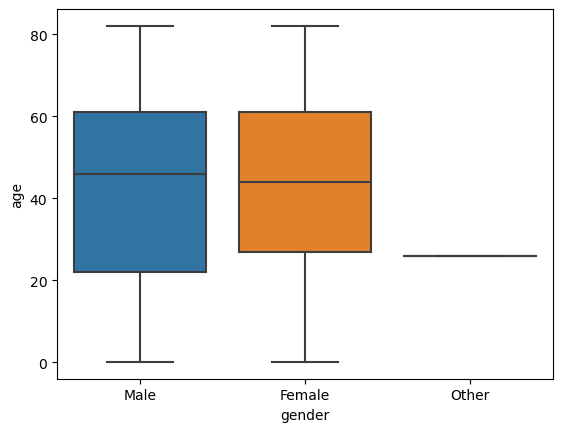

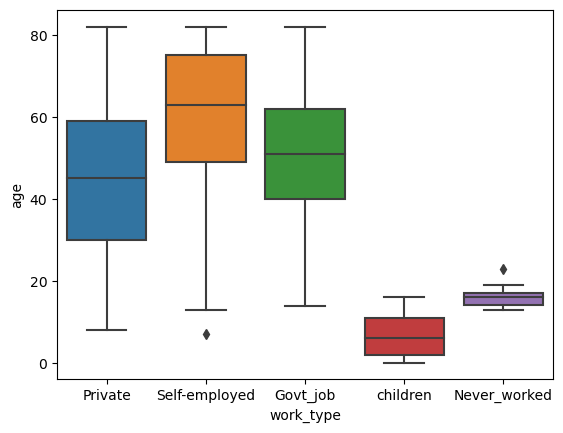

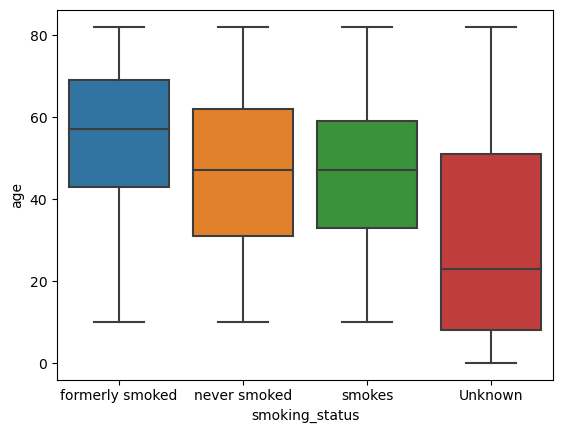

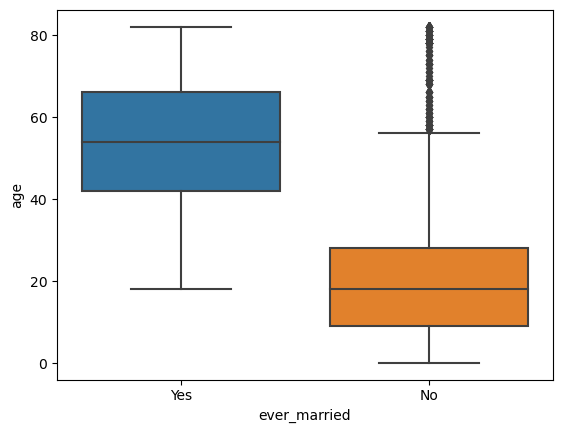

In [54]:
# ig, axes = plt.subplots(len(num), len(cat), figsize=(20, 15))

# # Generate boxplots for each numerical vs categorical combination
# for i, n in enumerate(num):
#     for j, c in enumerate(cat):
#         ax = axes[i, j]
#         sns.boxplot(x=df[c], y=df[n], ax=ax)
#         ax.set_title(f"{n} vs {c}")
#         ax.set_xticklabels(ax.get_xticklabels(), rotation=30)  # Rotate labels for clarity

# # Adjust layout to prevent overlap
# plt.tight_layout()
# plt.show()

sns.boxplot(y = df['age'],x = df['gender'])
plt.show()
sns.boxplot(y = df['age'],x = df['work_type'])
plt.show()
sns.boxplot(y = df['age'],x = df['smoking_status'])
plt.show()
sns.boxplot(y = df['age'],x = df['ever_married'])
plt.show()

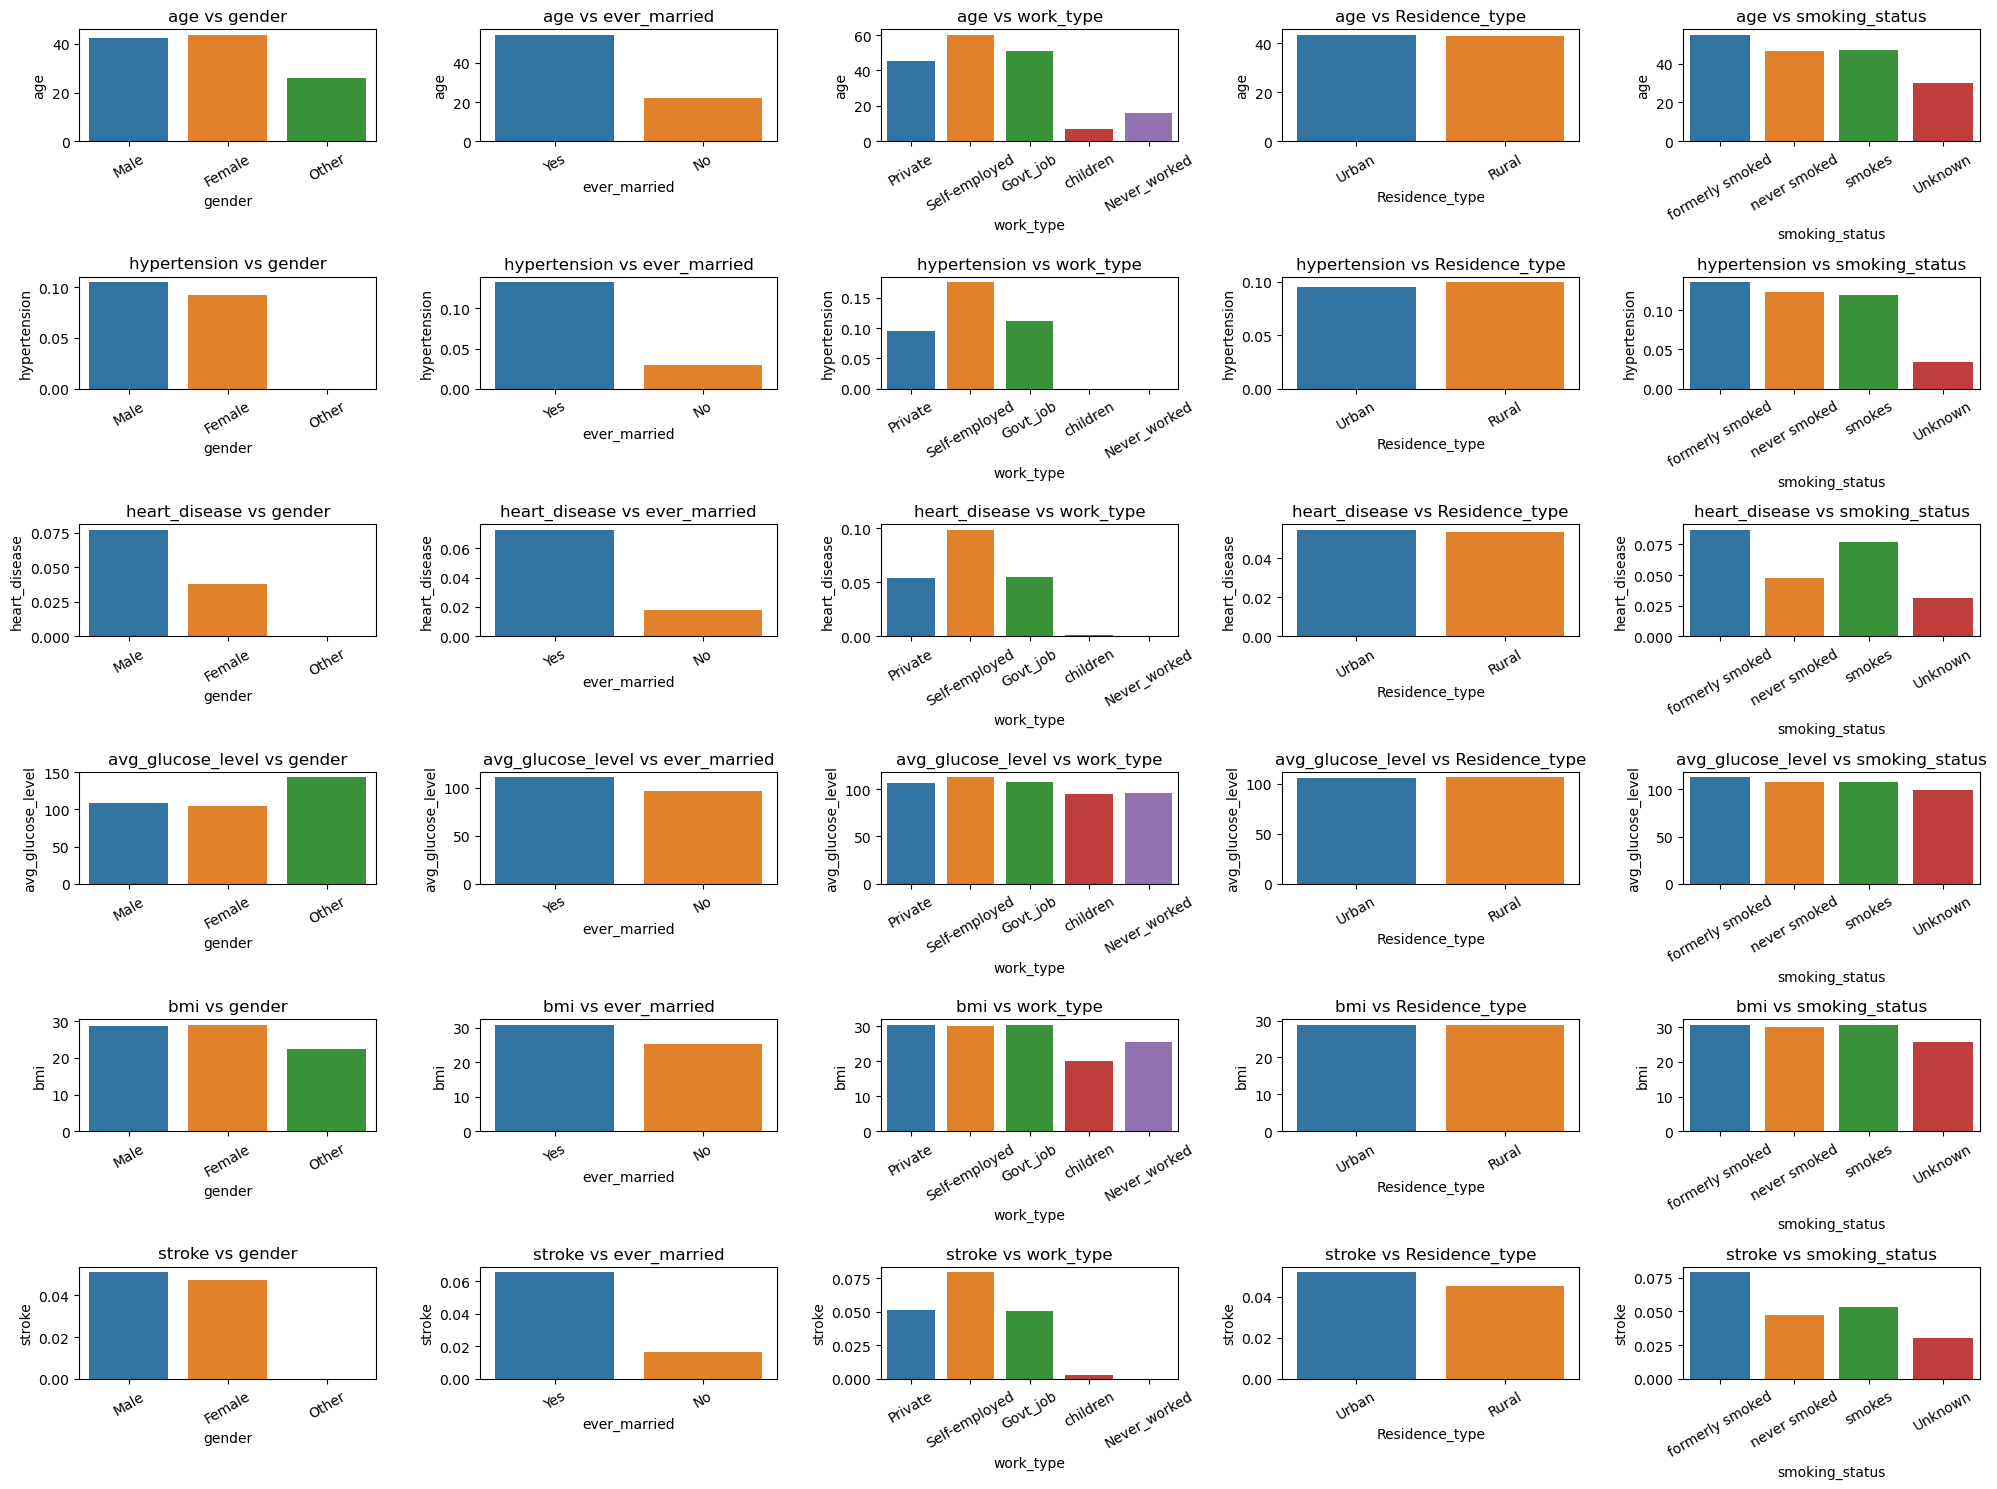

In [55]:
fig, axes = plt.subplots(len(num), len(cat), figsize=(20, 15))

# Generate bar plots
for i, n in enumerate(num):
    for j, c in enumerate(cat):
        ax = axes[i, j]
        sns.barplot(x=df[c], y=df[n], ax=ax, ci=None)  # ci=None removes error bars
        ax.set_title(f"{n} vs {c}")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30) 

plt.tight_layout()
plt.show()

In [56]:
for col in num:  
    skew_value = df[col].skew()  
    print(f"Skewness for column {col}: {skew_value:.2f}")  


Skewness for column age: -0.14
Skewness for column hypertension: 2.72
Skewness for column heart_disease: 3.95
Skewness for column avg_glucose_level: 1.57
Skewness for column bmi: 1.06
Skewness for column stroke: 4.19


### nunerical vs numerical

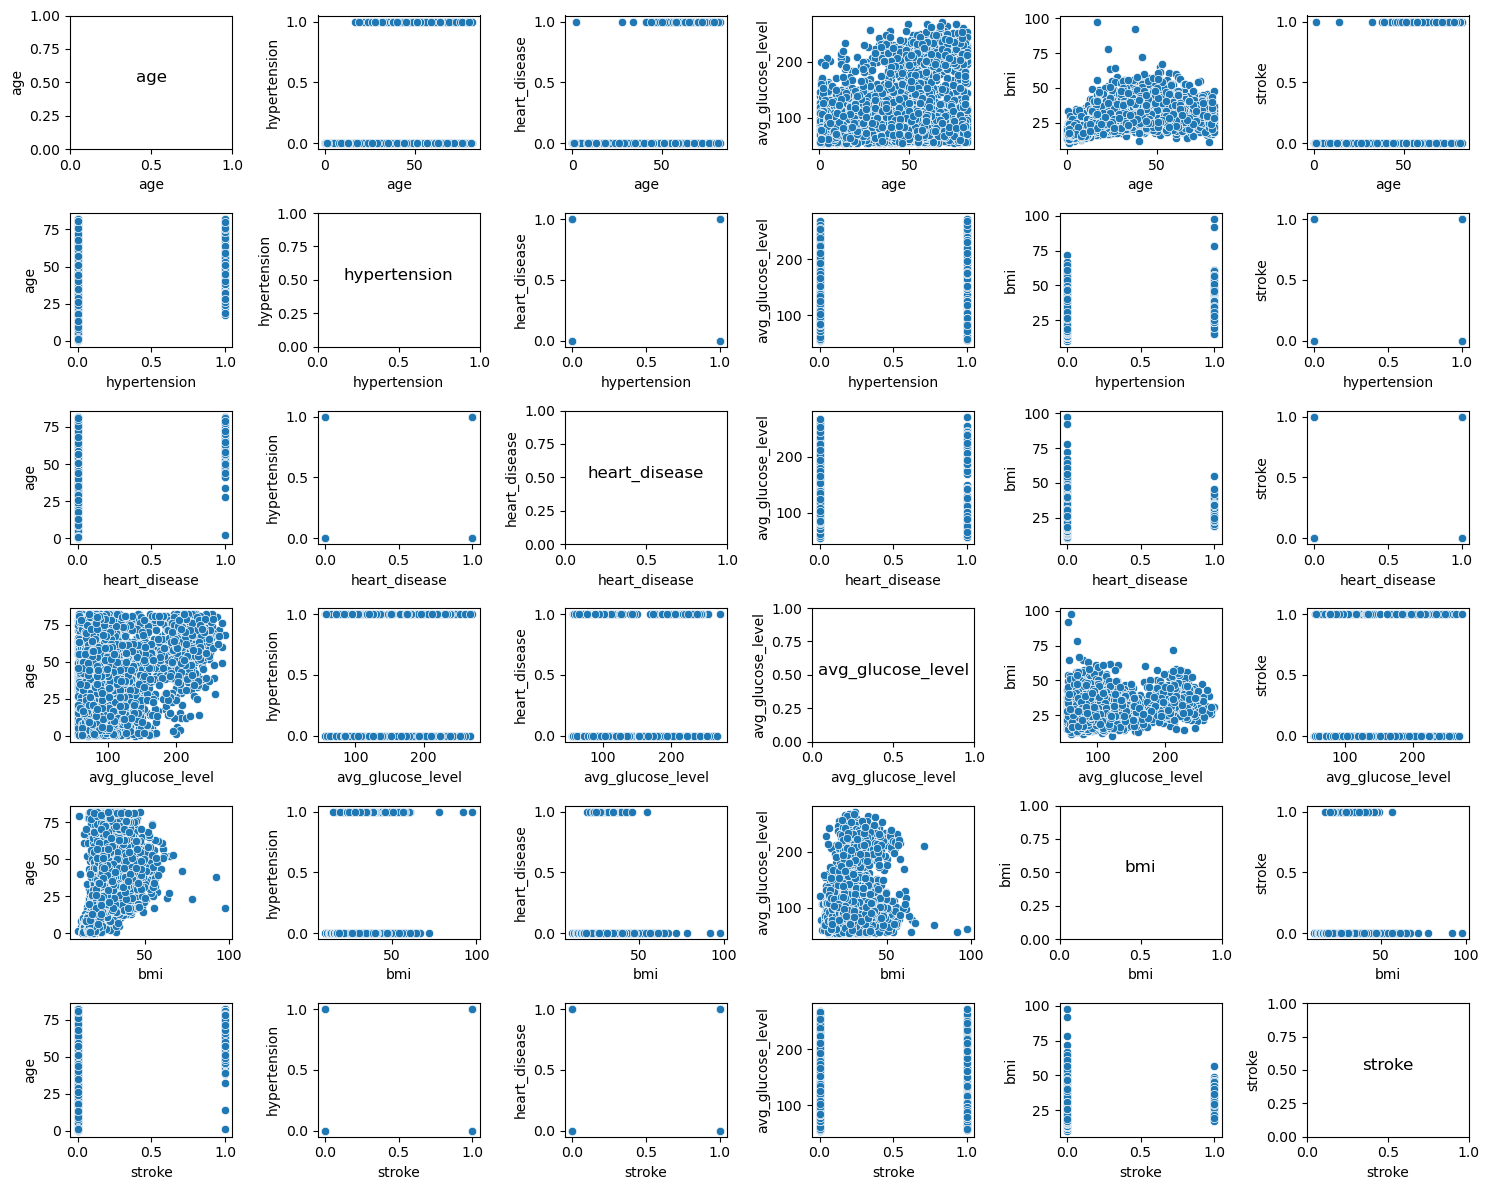

In [57]:
fig, axes = plt.subplots(len(num), len(num), figsize=(15, 12))

for i, num1 in enumerate(num):
    for j, num2 in enumerate(num):
        ax = axes[i, j]
        if i != j:  
            sns.scatterplot(x=df[num1], y=df[num2], ax=ax)
        else:
            ax.text(0.5, 0.5, num1, fontsize=12, ha='center') 
        ax.set_xlabel(num1)
        ax.set_ylabel(num2)

plt.tight_layout()
plt.show()

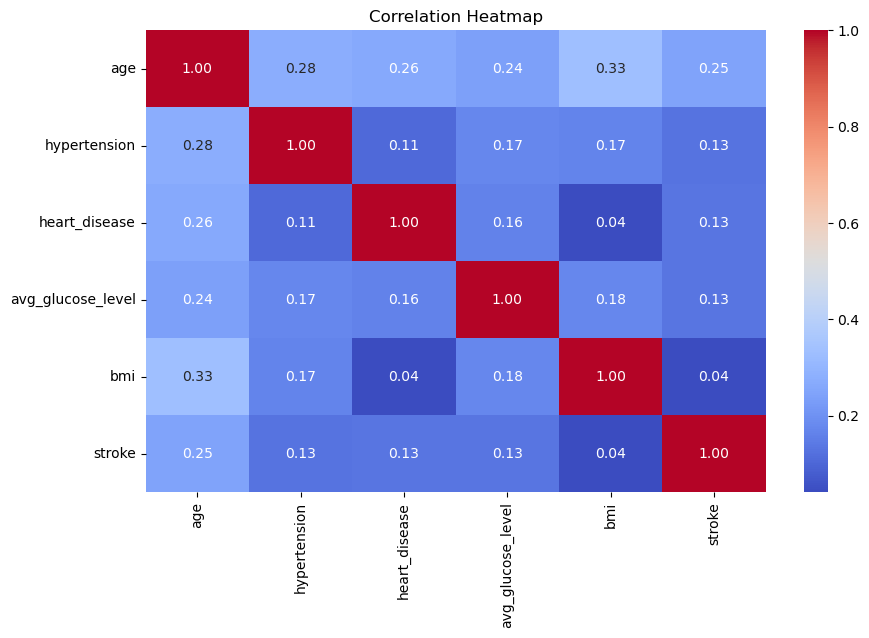

In [58]:


plt.figure(figsize=(10, 6))
sns.heatmap(df[num].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
### hypertension and age have good correlation 
### age and bmi have a good correlation
### heart disease and age have a good correlation

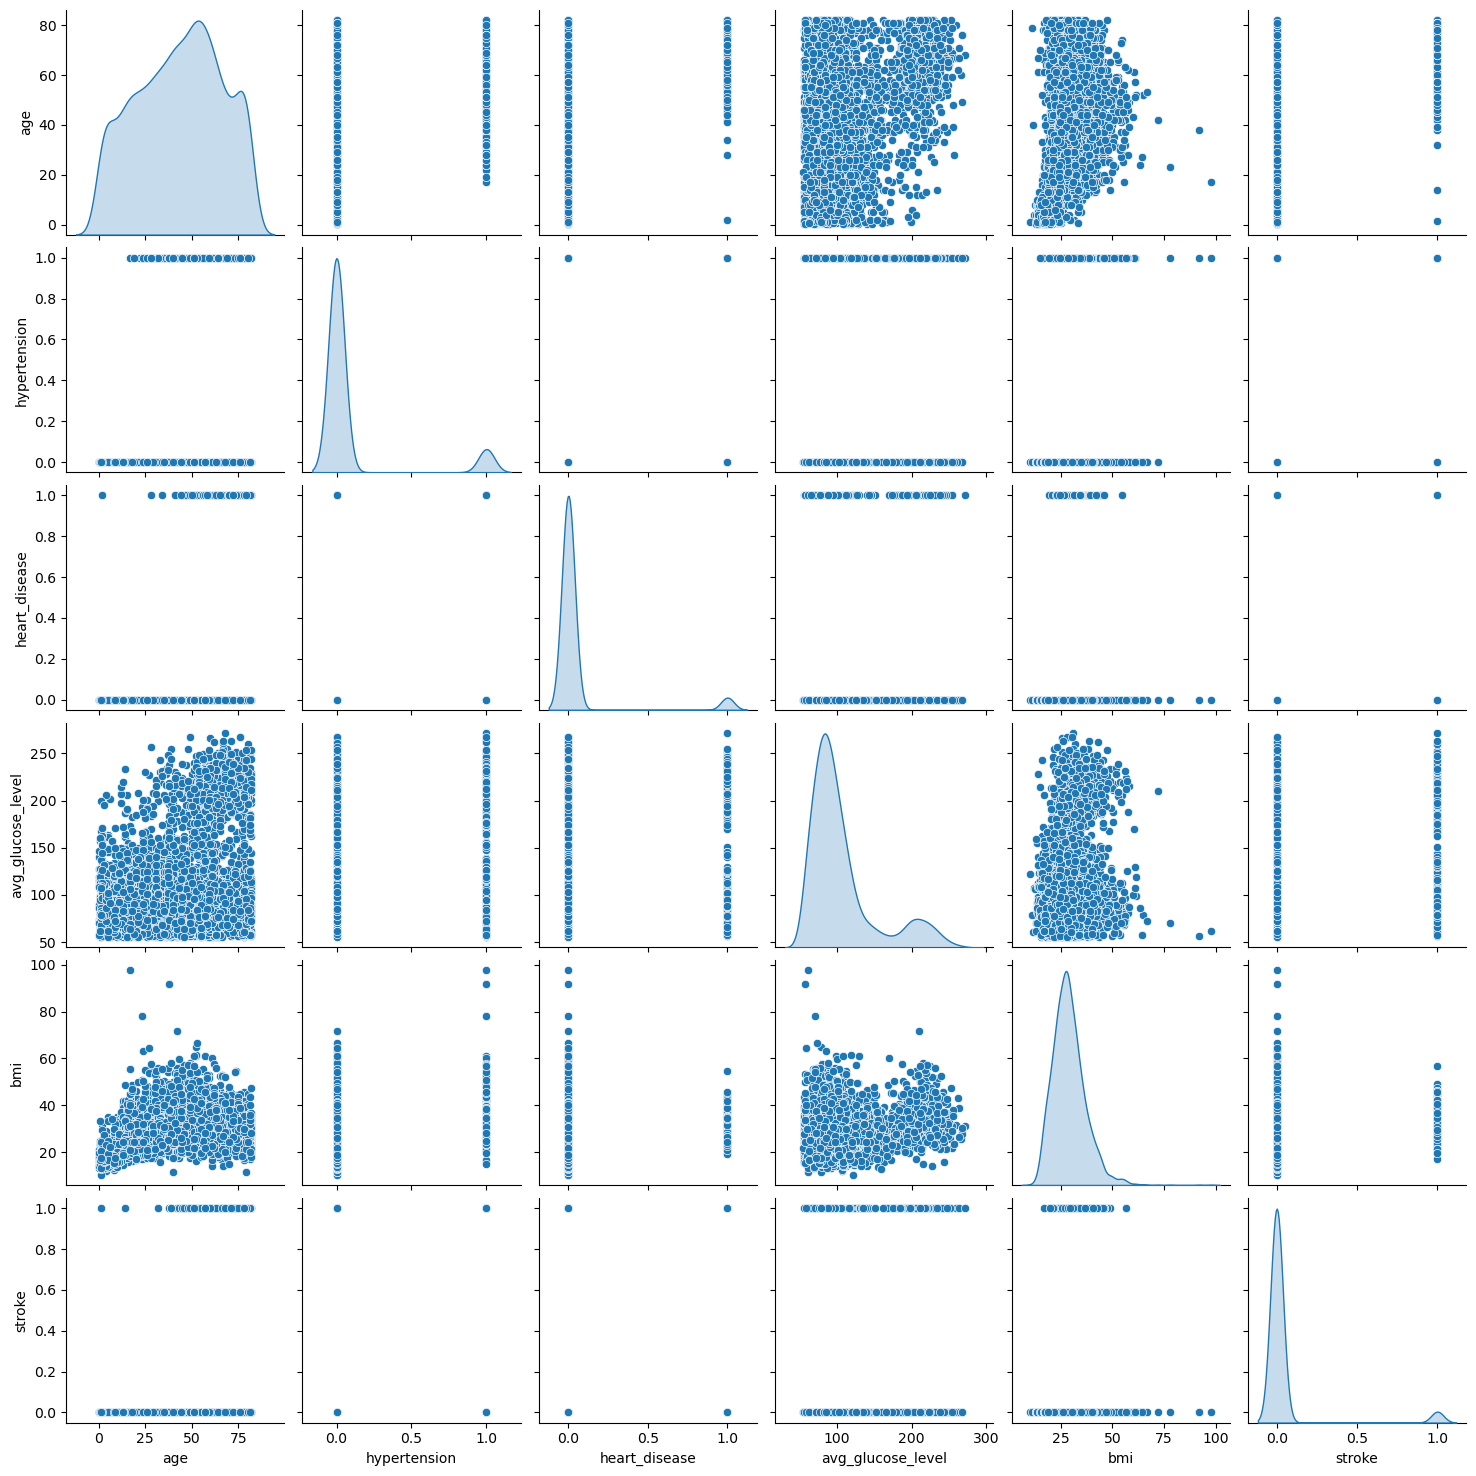

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[num], diag_kind="kde")  
plt.show()


In [61]:
from scipy.stats import ttest_ind

# Iterate through each numerical column
for col in num:
    for cat_col in cat:
        # Ensure the categorical column has only two unique values for a valid t-test
        if df[cat_col].nunique() == 2:
            # Get unique categories
            category_1, category_2 = df[cat_col].unique()
            
            # Filter numerical data based on categorical groups
            group_1 = df[df[cat_col] == category_1][col].dropna()
            group_2 = df[df[cat_col] == category_2][col].dropna()
            
            # Perform independent t-test
            t_stat, p_value = ttest_ind(group_1, group_2, equal_var=False)  # Welch's t-test
            
            # Print results
            print(f" T-test for {col} grouped by {cat_col}:")
            print(f"   t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}\n")


 T-test for age grouped by ever_married:
   t-statistic = 62.6618, p-value = 0.0000

 T-test for age grouped by Residence_type:
   t-statistic = 1.0138, p-value = 0.3107

 T-test for hypertension grouped by ever_married:
   t-statistic = 14.3603, p-value = 0.0000

 T-test for hypertension grouped by Residence_type:
   t-statistic = -0.5654, p-value = 0.5718

 T-test for heart_disease grouped by ever_married:
   t-statistic = 9.9093, p-value = 0.0000

 T-test for heart_disease grouped by Residence_type:
   t-statistic = 0.2210, p-value = 0.8251

 T-test for avg_glucose_level grouped by ever_married:
   t-statistic = 12.7604, p-value = 0.0000

 T-test for avg_glucose_level grouped by Residence_type:
   t-statistic = -0.3535, p-value = 0.7237

 T-test for bmi grouped by ever_married:
   t-statistic = 24.8288, p-value = 0.0000

 T-test for bmi grouped by Residence_type:
   t-statistic = -0.0086, p-value = 0.9932

 T-test for stroke grouped by ever_married:
   t-statistic = 9.3586, p-value 